In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 31.1 MB/s eta 0:00:00


Final phi: 3.2018415927886963
Final theta: 31.602645874023438
Final Expectation Value of Pauli-Z: 0.9826185551061325


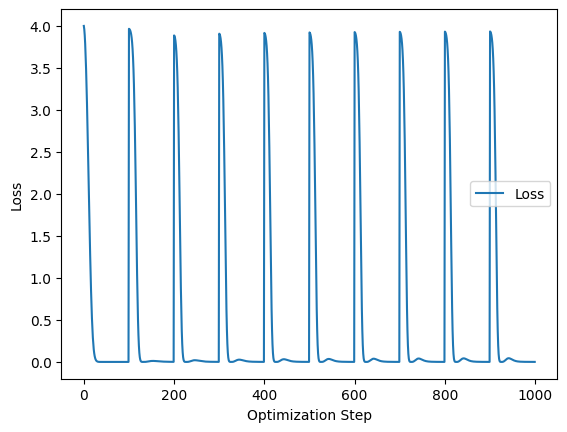

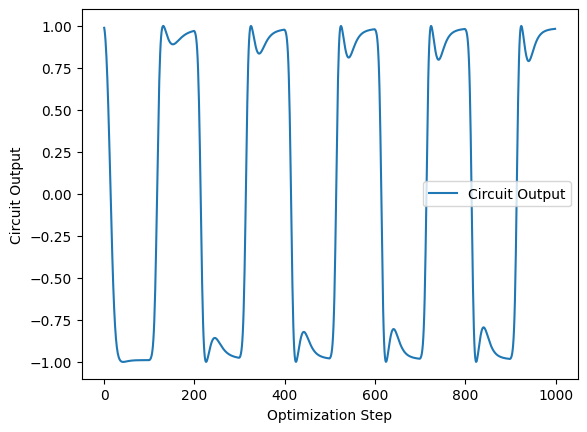

In [12]:
# a simple quantum circuit optimization using PennyLane and PyTorch.

import pennylane as qml
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt


dev = qml.device("default.qubit.torch", wires=1)

@qml.qnode(dev, interface='torch')
def circuit(phi, theta):
    qml.RX(theta, wires=0)
    qml.RZ(phi, wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(phi, theta, step):
    # Classical node
    target = -(-1)**(step // 100)
    return torch.abs(circuit(phi, theta) - target)**2

phi = Variable(torch.tensor(1.), requires_grad=True)
theta = Variable(torch.tensor(0.05), requires_grad=True)
opt = torch.optim.Adam([phi, theta], lr=0.1)

# Training Loop with Output Visualization:
losses = []

for i in range(1000):
    opt.zero_grad()
    loss = cost(phi, theta, i)
    loss.backward()
    opt.step()

    losses.append(loss.item())

# Print the final values of phi and theta
print("Final phi:", phi.item())
print("Final theta:", theta.item())

# Calculate and print the final expectation value of Pauli-Z
final_expectation = circuit(phi, theta).item()
print("Final Expectation Value of Pauli-Z:", final_expectation)

# Plot the loss curve
plt.plot(range(1000), losses, label='Loss')
plt.xlabel('Optimization Step')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the circuit output over optimization steps
plt.plot(range(1000), outputs, label='Circuit Output')
plt.xlabel('Optimization Step')
plt.ylabel('Circuit Output')
plt.legend()
plt.show()

